___
# <font color=#00FF77> CMSE 830</font>
## <font color=#00FF88> HW #4</font>

____



### Name: **Pham Dinh Gia Huy**

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interrupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist student who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data!

✍🏻 For this problem, do **not** use a library to compute the KDE - do it yourself using basic Python. Your plot will be similar to the one above. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)
* compute the percentage tip from the data, and store those values in an array
* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset
* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`
* from this plot, do you think that tips are normally distributed? why or why not?
* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _p_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,p) = \exp(-(x - p)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)
* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will be a rug plot,
* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?
* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)
* if you make your width _w_ too large, does the KDE predict anything impossible?
* finally, answer the question: do you think this is a normal distribution? Would you arrive at a different conclusion depending on which width _w_ you pick? What is your conclusion to the original conversation in the restaurant? Do you see outliers? (Put discussion in a markdown cell.)



_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


### 👉 My code following the guided steps:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tips_df = sns.load_dataset("tips")
print(tips_df)
print(tips_df.describe())

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.00000

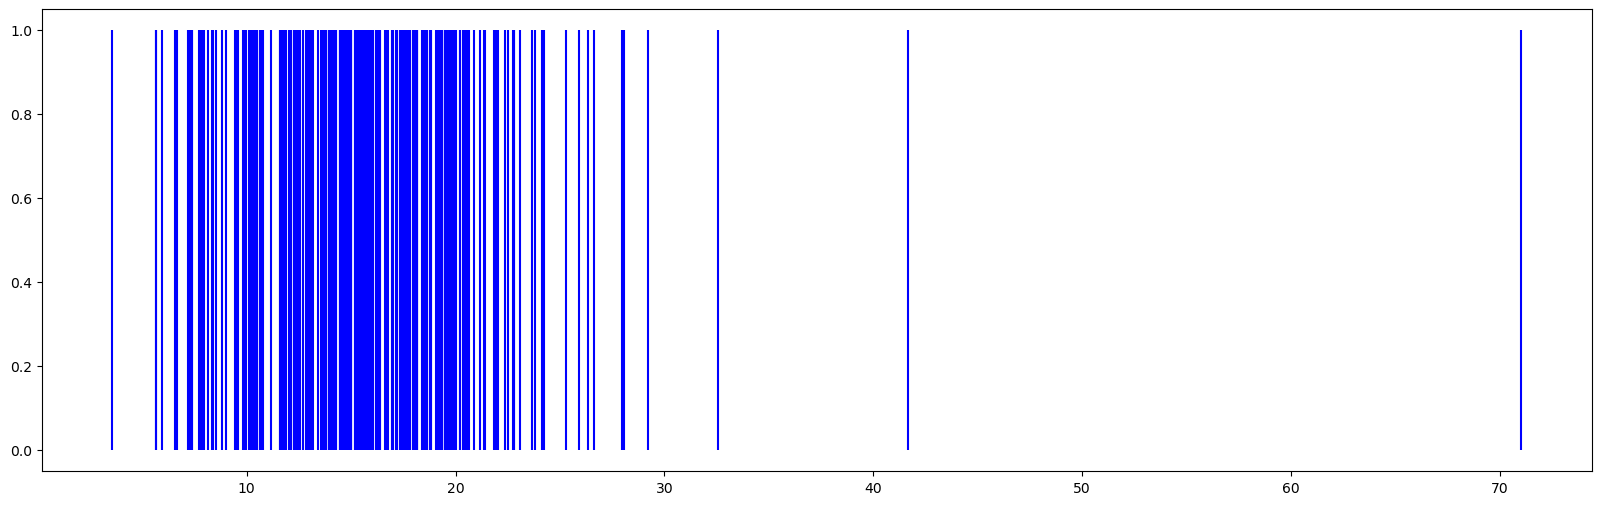

In [3]:
plt.figure(figsize=(20, 6))
plt.vlines(x = 100*tips_df['tip']/tips_df['total_bill'], ymin=0, ymax=1, colors='b', linestyles='solid')


No, the tips are seemingly not normally distributed, they center between the [0.1, 0.2] interval quiet a bit but there are not one exact mean as the center, there are a few different clusters of tip percentage values.

Text(0.5, 1.0, 'Width = 6')

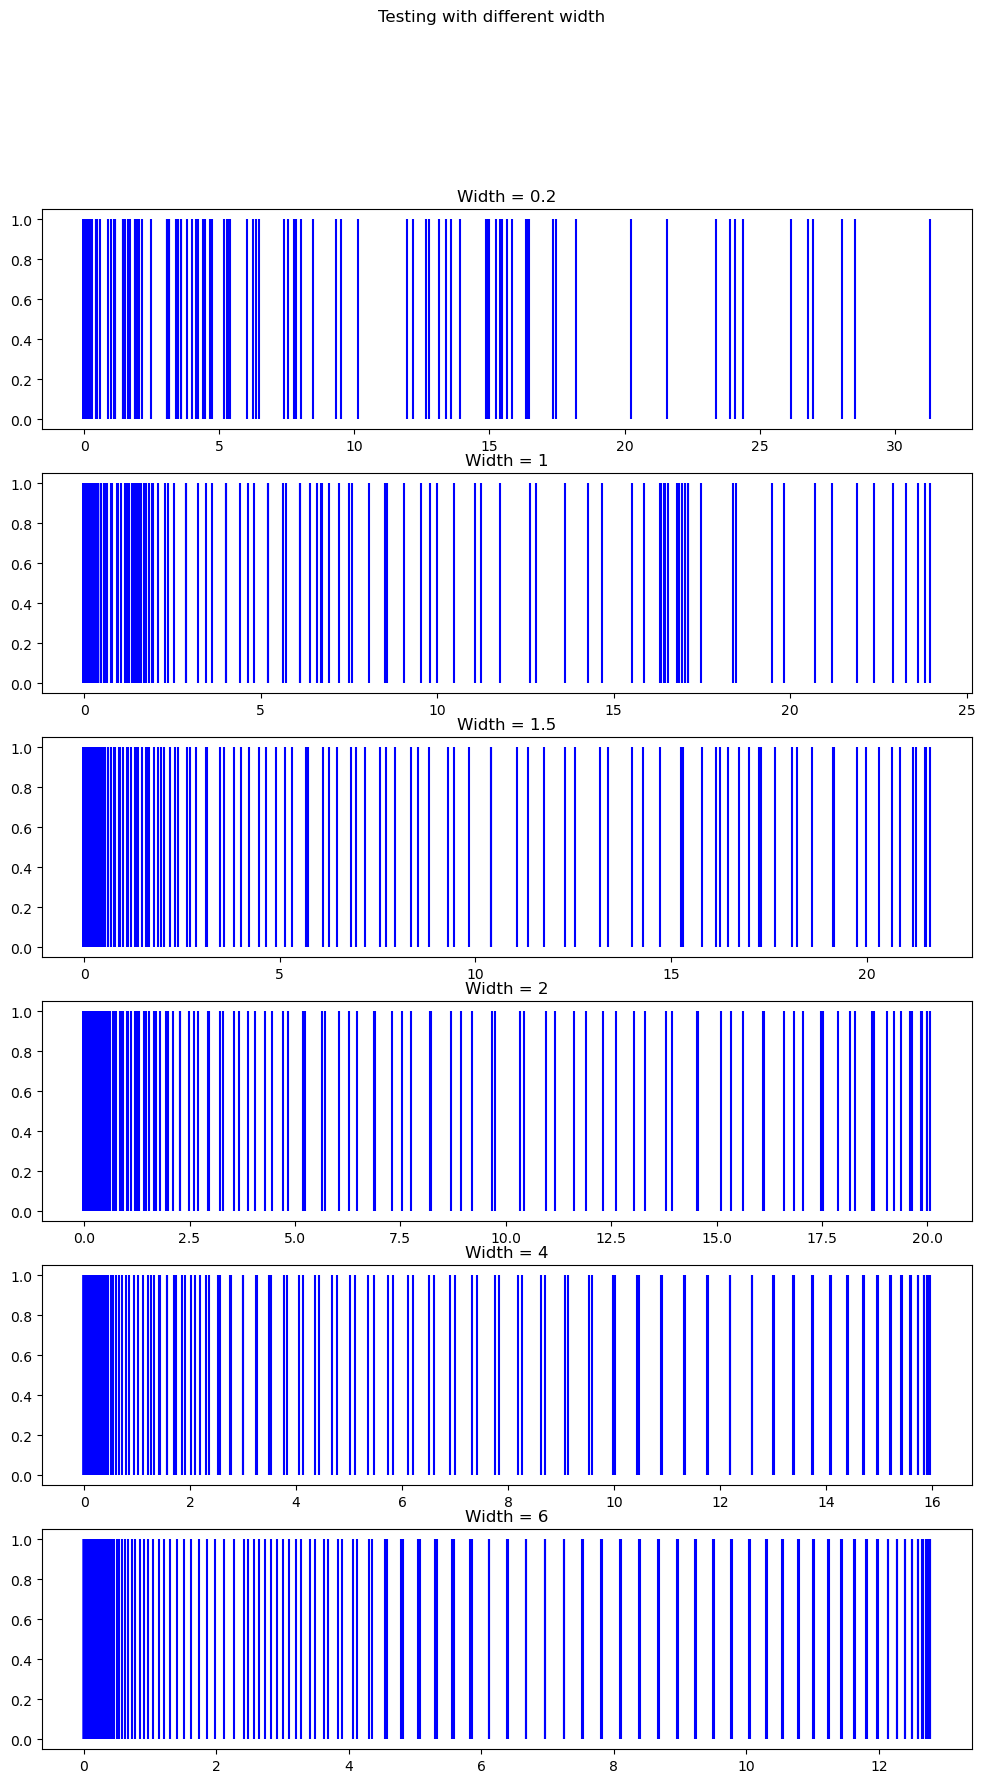

In [4]:
def my_kde(x, p, w):
    kernel = np.zeros(len(x))
    for i in p:
        kernel += np.exp(-(x - i)**2/(2*w**2))/(np.sqrt(2*np.pi)*w)
    return kernel

x = np.linspace(2, 72, 250)
tip_percent = np.array(tips_df['tip']/tips_df['total_bill'])*100

rug = my_kde(x, tip_percent, 0.2)
rug2 = my_kde(x, tip_percent, 1)
rug3 = my_kde(x, tip_percent, 1.5)
rug4 = my_kde(x, tip_percent, 2)
rug5 = my_kde(x, tip_percent, 4)
rug6 = my_kde(x, tip_percent, 6)


fig, axs = plt.subplots(6, figsize=(12, 20))
fig.suptitle('Testing with different width')
axs[0].vlines(x = rug, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[0].set_title('Width = 0.2')
axs[1].vlines(x = rug2, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[1].set_title('Width = 1')
axs[2].vlines(x = rug3, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[2].set_title('Width = 1.5')
axs[3].vlines(x = rug4, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[3].set_title('Width = 2')
axs[4].vlines(x = rug5, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[4].set_title('Width = 4')
axs[5].vlines(x = rug6, ymin=0, ymax=1, colors='b', linestyles='solid')
axs[5].set_title('Width = 6')

#plt.vlines(x = rug, ymin=0, ymax=1, colors='b', linestyles='solid')


#plt.vlines(x = rug, ymin=0, ymax=1, colors='b', linestyles='solid')

    


📝It seems that the wider the width, the denser the plotted tips that we can see after going through the kernel. I think width = 1 is the most acceptable since we can data is distributed throughout the whole range and not too dense that can make it noisy.

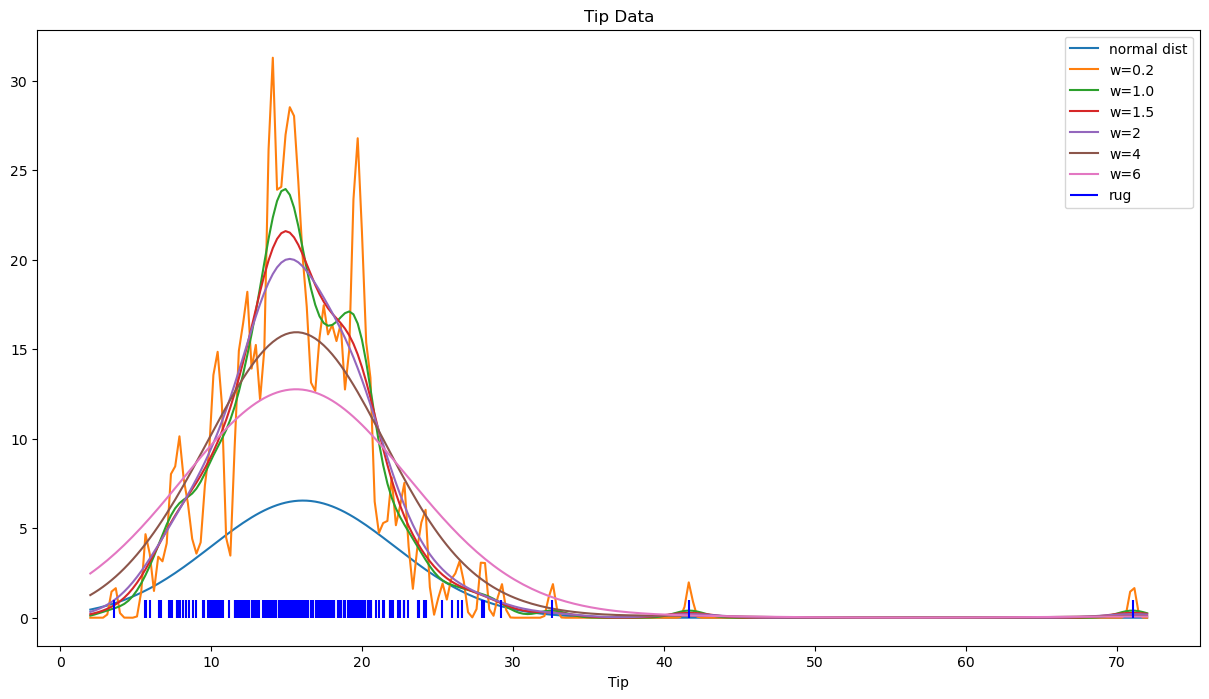

In [5]:
plt.figure(figsize=(15,8))
plt.plot(x, 100*np.exp(-(x - np.mean(tip_percent))**2/(2*np.var(tip_percent)))/(np.std(tip_percent)*np.sqrt(2*np.pi)), label='normal dist')
plt.plot(x, rug, label="w=0.2")
plt.plot(x, rug2, label="w=1.0")
plt.plot(x, rug3, label="w=1.5")
plt.plot(x, rug4, label="w=2")
plt.plot(x, rug5, label="w=4")
plt.plot(x, rug6, label="w=6")
plt.vlines(x = 100*tips_df['tip']/tips_df['total_bill'], ymin=0, ymax=1, colors='b', linestyles='solid', label="rug")

plt.title("Tip Data")
plt.xlabel("Tip")
plt.legend()

📝 It is very close to a normal distribution but I still don't think it is, it is more of a left-skewed distribution. I will definitely arrive at different conlcusion as to whether this is the case if I work with a different width value. If I choose a with value > 2, this would look like a normal distribution to me.

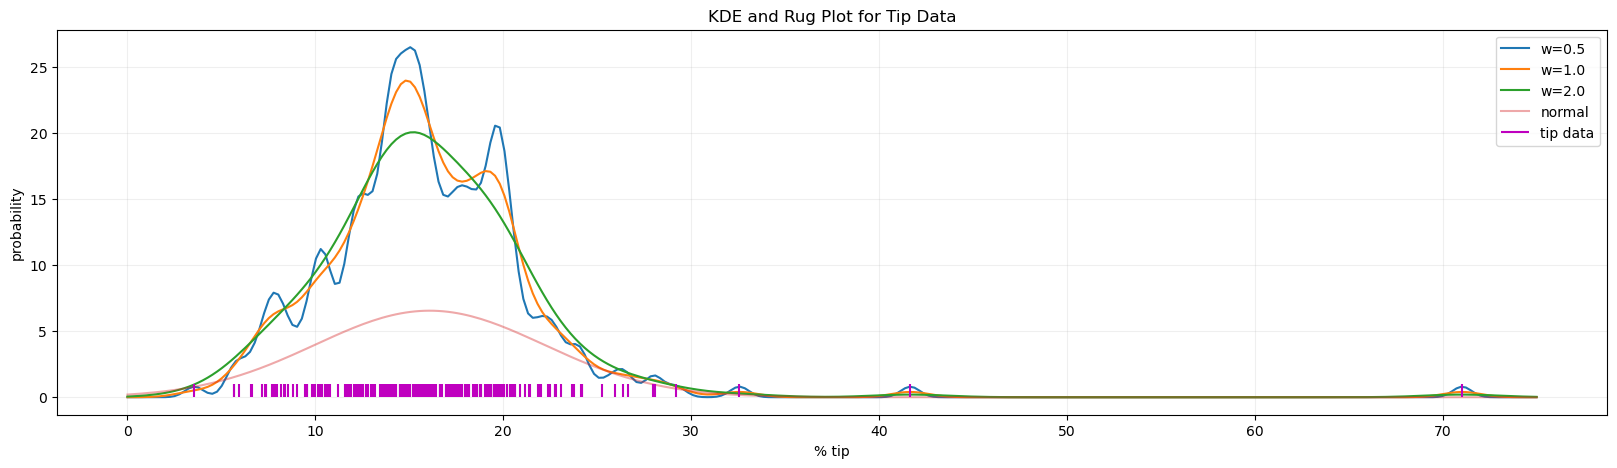

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

df = sns.load_dataset("tips")
tip_perc = np.array(df["tip"]/df["total_bill"])*100


def my_kde(x_vals, tips, width):

  kde = np.zeros(len(x_vals))

  for tip in tips:

    kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

  return kde

x_vals = np.linspace(0,75, 300)

plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)),
         alpha = 0.4, label='normal')

# rug plot
plt.vlines(tip_perc, 0, 1, 'm', label='tip data')

plt.grid(alpha=0.2)
plt.title("KDE and Rug Plot for Tip Data")
plt.xlabel("% tip")
plt.ylabel("probability")
plt.legend()

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### <font color=#839383>_choosing a topic for your project_</font>

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project.

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story.

Last week you examined several datasets that might be useful for your project. For this HW problem, you can use what you did last week; or, this is the time to choose different datasets if you didn't find last week's interesting or useful. After this week, you should decide on a dataset and stick with it at least through the midterm project.


✍🏻 In a markdown cell below, answer these questions:
* from a set of at least three datasets, discuss what they reveal to you,
* what is interesting about these datasets from a science point of view?,
* what is interesting about these datasets from a _data_ science point of view?
* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,
* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

Based on these steps, which of the datasets is the more interesting to you for your project and why?

The goal is for you to decide on a topic and know that it will be usable. Very often we have a project in mind for which there is no dataset available that allows us to do what we want. This is the time to ensure, through EDA on several datasets, that our project is realistic.

If you choose one of the more common and simple datasets, such as MPG, Penguin or Iris, you need to have a very compelling reason for your choice. There is already a lot known on the web about these datasets and there is very little new you can do with them. 

### 🍝 Dataset: The Nutritional Content of Food

In [12]:
import pandas as pd

path = r'C:\Users\Admin\OneDrive - Michigan State University\Courses\CMSE 830\HW and Assignment\Dataset\Food_nutrition.csv'
nutri = pd.read_csv(path)
nutri

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


In [13]:
nutri.describe()

,index,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8790.000000,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416
std,2537.598767,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,2197.250000,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000
max,8789.000000,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_6116\3704499761.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  nutri.hist(bins=30, ax=ax)


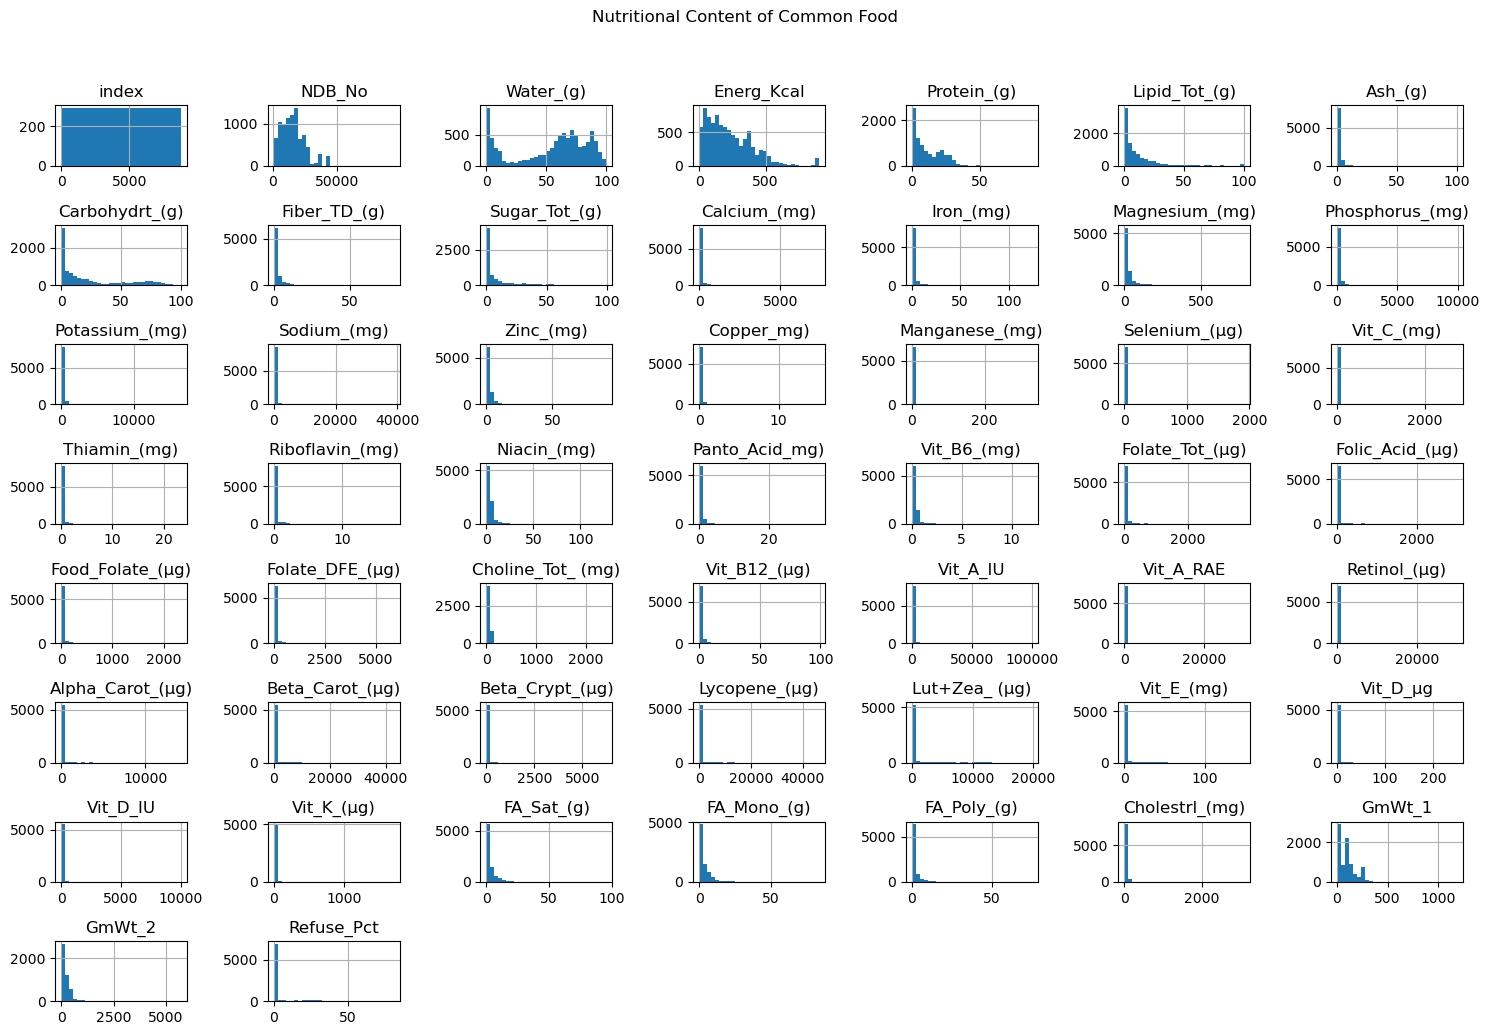

In [14]:
fig = plt.figure(figsize=(15,10)); ax = fig.gca()
nutri.hist(bins=30, ax=ax)
plt.suptitle('Nutritional Content of Common Food', y=1.03)   
plt.tight_layout()

📝 I have a total of 4 dataset options that can potentially be used for the project (3 from the last Homework 3, and a new one just above!)

* from a set of at least three datasets, discuss what they reveal to you:

*For me, the "Spotify Song Attributes Dataset" and the "Global YouTube Statistics Dataset" would potentially give me an idea of what can be regarded as "trend" in the entertainment domain by looking specifically at the top performers' statistics in these platform. The "Vietnam 2021 High School Graduation Exam Marks" would give me a gist of the distribution of Vietnamese high-schoolers performance in several subjects in 2021. For the new dataset "The Nutritional Content of Food", it can provide valuable nutritional data for several common food items that we enjoy on a daily basis.*

* what is interesting about these datasets from a science point of view?,

*For science, I guess the first two would be useful for studies on behavioral science, where we examine what are the most important components that would make something attracting or popular. For the "Vietnam 2021 High School Graduation Exam Marks" dataset it can be useful for educational science or cognitive science where this acts as the indication of the competence level of high-schoolers across subjects. The last one should be crucial for food or nutritional science where these nutritional data can be used in tandeem with health or medical data to analysis or predict the interaction of certain types of food with an aspect of health or a specific diseases.*

* what is interesting about these datasets from a _data_ science point of view?

*From data science point of view, the first two can be interesting to find a sort of 'successful formula' that may help to boost the chance of a content/campaign is well-recieved and is able to reach a wide range of audiences. The "Vietnam 2021 High School Graduation Exam Marks" can potentially reveal connection between certain subjects so the performance in one can predict another, or it can help to detect abnormality in students performance aiding cheating investigation. The nutrition dataset can be used to find the most nutritious food or better yet can help people to recommend a balanced and nutritious meal plan depending on the nutritional requirement that they have.

* you will create a web app in Streamlit, placed at GitHub: what would a web app do for each of the datasets?,

*For the first two, the webapp may display statistics for trending type of contents that can be filtered by a set of attributes or it can even predict the chance of success for a specific entertainment product's statistics. The exan marks will show graphs on subjects performance, correlation, normal vs abnormal datapoints and provide a tool to calculate the marks needed for a specific exam goal depending on the estimated performance of the students. The nutrition datset can show filterable charts of food's nutritional content, help to recommend a nutrition-dense meal plans for a particular calories goal, ...*

* you are not the user of your web app - you are creating it for someone you will never meet: what do you want them to get from the web app for each of these dataset?

*For the first two, the webapp may let users view trend depending on their interested areas or recommended values for a typical well-performed content depending on the inputed fixed attributes (like genre, type of channel, country, ...) or predict a 'trending rate' of the user-input entertainment product's statistics. For exam marks webapp, users can view the performance distribution of filtered subject and estimate their standing, it can suggest marks for the chosen subjects combination corresponding to the inputed overall score goal and self-assesment. The last one would let user to filter the type of food or certain nutritional data that they are interesting in and see the benchmark of different food. It can also recommend a meal plan for a particular requirement that the users have (calories goal, fat intake, ...)*

**🥗From these, "The Nutritional Content of Food" dataset is the most interesting to me because it's the exact commodity that I can't live without. I love eating and I do want to be a little more health-consicious about my food intake so explore this dataset may give me surprising insights that I can actually use to improve my life quality!**

____
![project](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)
## Problem #3 (5pts)

### <font color=#839383>more on Streamlit</font>

From the previous problem, choose your favorite dataset - the one you are liking to use for the midterm project. Build that into a very simple Streamlit app.

Do that by watching this video. Follow the video and build a web app as you are watching, but using the dataset you chose from the previous problem.

The goal is that you start to connect the narrative associated with the data to what the purpose of the web app might be.

If you are having any trouble with deploying Streamlit, please contact us on Slack.


In [15]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_Um12_OlGgw?si=pYR7WmeChe7Xxpq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it?
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have?
4. define "missingness",
5. what are the three main types of missingness?
6. how is multiple imputation implemented?
7. what is mean substitution, and what can go wrong?
8. what is regression substitution, and what does it miss?
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR


### 📝 Answers:
1. Imputation is like filling in the gaps in your dataset. We want to replace missing values with something reasonable to make the data more complete and usable.
2. Listwise deletion is to remove entire rows from a dataset if they have any missing values. Potential problems is we can lose a lot of data if many rows have missing values and causes the dataset to be biased.
3. Pairwise deletion is deleting or ignoring just the missing values in the variables where they occur not deleting the entire rows like how listwise deletion behaves. Potential problem is it can create impossible correlation matrices.
4. "Missingness" is the manner in which data are missing. In orther words, "Missingness" is the characteristic of the missing data that helps to catergorize the type of missing, each catergories has its own features and suggests the most effective approach to deal with these missing values in a particular dataset.
5. Three types are:
* Missing Completely at Random (MCAR)
* Missing at Random (MAR)
* Missing Not at Random (MNAR)
6. Multiple imputation is implemented by replacing missing values with several different models to estimate the missing values. These different missing data generation models will return different analysis results which are then pooled to reach the final results.
7. Mean substitution is to replace missing data with the average of the available data for that variable. What can go wrong is that it doesn't account for variation in the data, and it can mess up with the relationships between variables.
8. Regression substitution is using regression to captures the trend that is lost when we use mean substitution. However, it may miss important message in the data like the variation of the dataset or leads to misleading correlations.
9. Stochastic regression adds variance to regression substitution, which helps create more realistic and similar to noise in the real dataset. It is a more effective way to remedy the missing data without messing up the existing relationships between variables.
10. Best to worst: MCAR > MAR > MNAR (most problematic)

___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression).

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots.

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions".

✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot.

Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information.

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do.

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

📝 Gaussian: $\mu$ is the mean or the expected value of the distribution while $w$ is the standard deviation or the spread of the distribution

Text(0.5, 1.0, 'Gaussian/Normal Distributions')

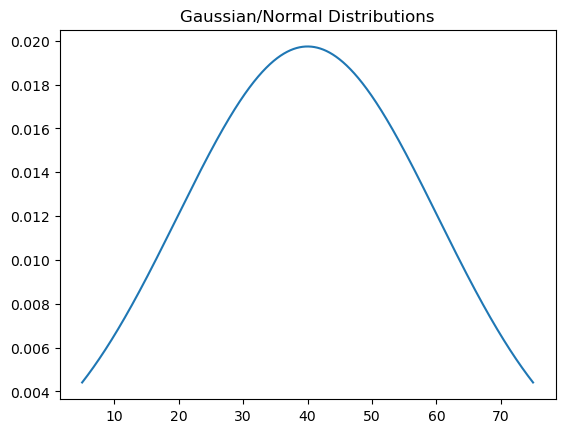

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.arange(5, 75, 0.01)
muy = x_axis.mean()
w = x_axis.std()
#print(muy, w)

p_x =(np.exp(-(x_axis-muy)**2/(2*w**2)))/(w*np.sqrt(2*np.pi))
plt.plot(x_axis, p_x)
plt.title("Gaussian/Normal Distributions")

📝Multivariate Gaussian: $w_x$, $w_y$ are the spread or width of the Gaussian distribution along the x-axis and y-axis respectively, the larger the value the wider the distrubution in that direction. $\mu_x$ and $\mu_y$ are the mean or expected value of the Gaussian distribution along the x-axis and y axis respectively, they decide the peak of the distribution.

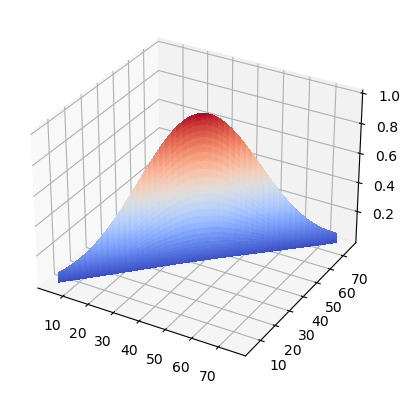

In [64]:
x_axis = np.arange(5, 75, 0.1)
y_axis = np.arange(5, 75, 0.1)
X, Y = np.meshgrid(x_axis, y_axis)

muy_x, muy_y = 40, 50
w_x, w_y = 15, 15

p_xy= np.exp(-(X-muy_x)**2/(2*w_x**2) - (Y-muy_y)**2/(2*w_y**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_axis, y_axis, p_xy, cmap='coolwarm', linewidth=0, antialiased=False)


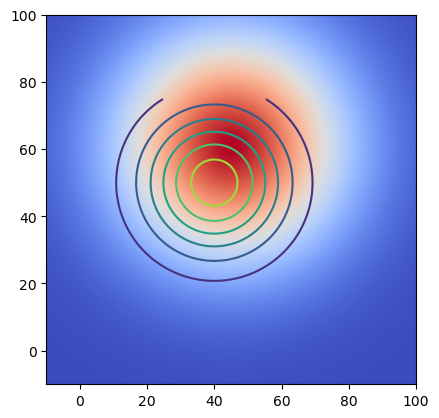

In [62]:
plt.contour(X, Y, p_xy, extent=(-10, 100, -10, 100))
plt.imshow(p_xy, extent=[-10, 100, -10, 100], origin='lower', cmap='coolwarm')


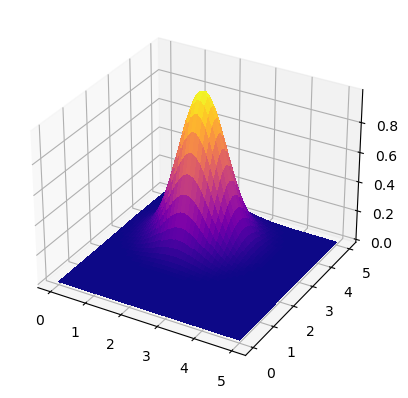

In [8]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

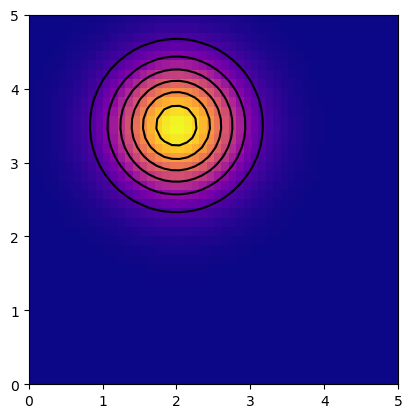

In [9]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information?

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

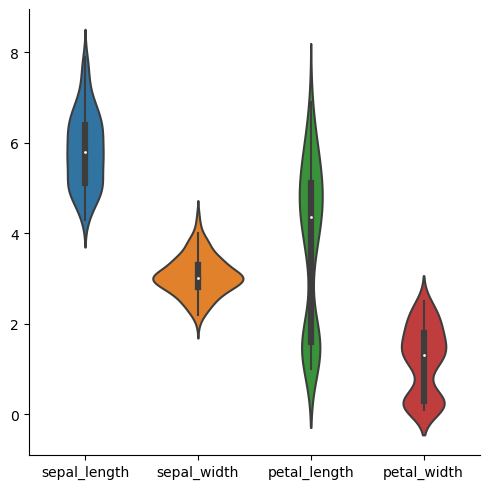

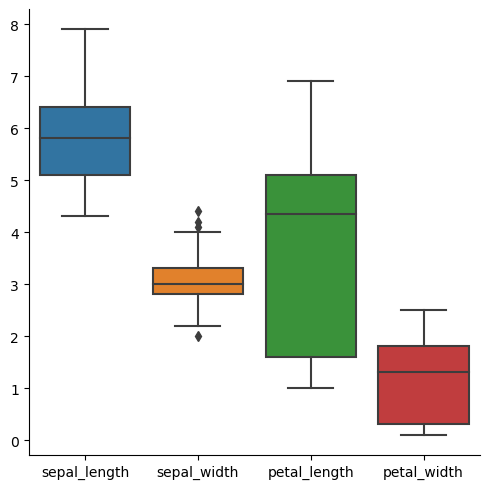

In [10]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")
sns.catplot(data=df_iris, kind="box")

🎻 the white dot in the violin plot is the median, the black bar in the center is the interquartile range while the extended line from the black bar is the rest of the distribution. Each side of the gray line is a kernel density estimation to show the distribution shape of the data, the wider the violin body section, the denser the distribution values there. 

🎻 Looking at the violin plots for the iris dataset we can see that in each type of dimension (sepal or petal) the length values are generally more spread out than the width values and the sepal dimensions seem likely to be normally distributed.

🎁 Box plot gives direct infomations on the distribution of values in a dataset by using data quartiles. The line that divides the box into two parts is the median. the lower end of the box indicates that 25% of the data is below this value while the upper end of the box indicates that 25% of the data is above this value. The end of lower and upper whisker represents the lowest and highest data, excluding outliers. All the dots outside of the box and whiskers are considered outliers.

🎁 Looking at the viboxolin plots for the iris dataset we can see that in each type of dimension (sepal or petal) the length values are generally more spread out than the width values. All dimensions distribution seems skewed with only sepal lenth tends to be a little balancedly distributed around the median. Sepal width is the only data that has outliers.